# Support Vector Machines


## Contents:
* [A Linear Problem](#1.-A-Linear-Problem)
    * [Generating a Dataset](#1.1.-Generating-a-Dataset)
    * [An Interactive Example](#1.2.-An-interactive-example)
* [A Not-So-Tidy Dataset](#2.-A-Not-So-Tidy-Dataset)
    * [Generating a Dataset](#2.1.-Generating-a-Dataset)
    * [Soft Margins](#2.2.-Soft-Margins)
* [Multiclass](#3.-Multiclass)
* [A Nonlinear Problem](#4.-A-Nonlinear-Problem)
    * [Generating a Dataset](#4.1.-Generating-a-Dataset)
    * [Radial Basis Function Kernel](#4.2.-Radial-Basis-Function-Kernel)
* [Prediction](#5.-Prediction)
---

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Support vector classifiers
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

# random data generation
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles
import random

# interaction
from ipywidgets import interact, fixed

---
# 1. A Linear Problem

Linear separability is a property of a __pair of sets of points__. This is most easily visualized in two dimensions (the Euclidean plane) by thinking of one set of points as being colored yellow and the other set of points as being colored red. These two sets are linearly separable if there exists at least one line in the plane with all of the yellow points on one side of the line and all the red points on the other side.

### 1.1. Generating a Dataset

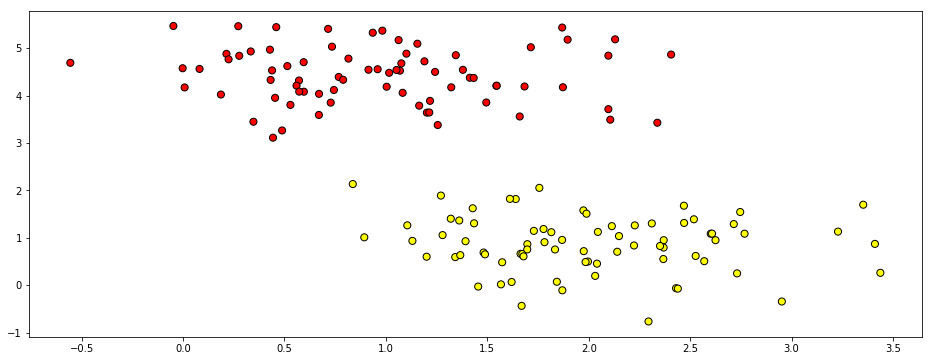

In [2]:
# X: The generated samples
# y: The integer labels for cluster membership of each sample.

X1, y1 = make_blobs(n_samples=150, centers=2, random_state=0, cluster_std=0.60)
fig, ax = plt.subplots(1, figsize=(16, 6))
# c denotes the color which is controlled by the classification
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn', edgecolors='black');

In machine learning, support vector machines (SVMs) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories.

an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier (although methods such as Platt scaling exist to use SVM in a probabilistic classification setting).

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible. New examples are then mapped into that same space and predicted to belong to a category based on which side of the gap they fall.

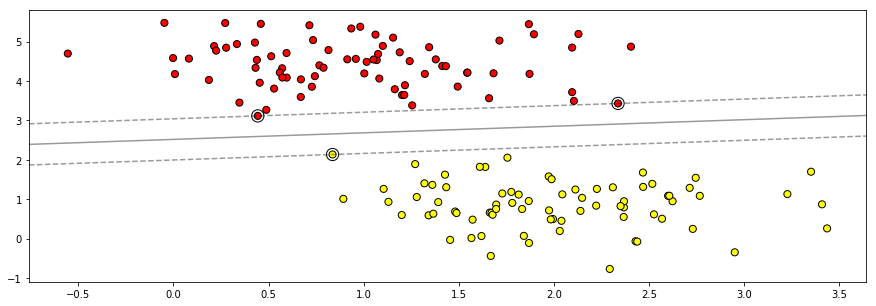

In [3]:
# this method plots a 2d support vector classifier
# if drawBoundary is set to False the hyperplane and margins will not be drawn
def plotSVC(model, ax=None, drawBoundary=True):
    if(ax == None):
        ax = plt.gca()
        
    # mapping the boundaries
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot hyperplane and margins
    # this is the gap between the two sets
    if(drawBoundary):
        ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.4, linestyles=['dashed', 'solid', 'dashed'])
        
        # marking the support points specifically
        # these are the points that lie on the dashed lines and mark the edges of the gap
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=50, linewidth=2, facecolors='none');
        ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=150, linewidth=1, facecolors='none', edgecolors='black');
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)

# setting the figure size
plt.subplots(1, figsize=(15, 5))
model1 = SVC(kernel='linear', C=1E10, probability=True).fit(X1,y1)
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn', edgecolors='black')
plotSVC(model1)


### 1.2. An interactive example
Here you can draw the slider from left to right to see how the decision boundary and margins change depending on the dataset given

In [4]:
def plotSVM(points):
    X, y = make_blobs(n_samples=600, centers=2, random_state=0, cluster_std=0.60)
    X = X[:points]
    y = y[:points]
    
    # note that we are using the linear kernel
    model = SVC(kernel='linear', C=1E10).fit(X, y)
    fig, ax = plt.subplots(1, figsize=(16, 6))
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='black')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plotSVC(model, ax)

interact(plotSVM, points=(10, 550, 25), ax=fixed(None));

interactive(children=(IntSlider(value=260, description='points', max=550, min=10, step=25), Output()), _dom_classes=('widget-interact',))

## 2. A Not-So-Tidy Dataset

Often you will come across a dataset where the separation between sets is not as neat as the above examples.

### 2.1. Generating a Dataset

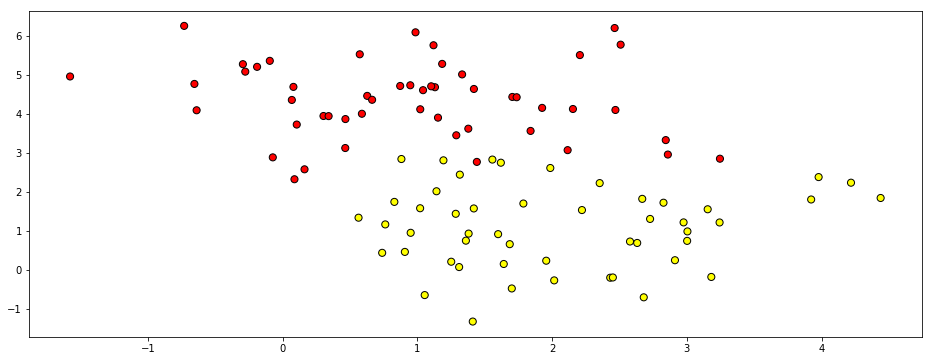

In [5]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1)
plt.subplots(1, figsize=(16, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='black');



### 2.2. Soft Margins
The margins demonstrated in the linear and nonlinear problems above had so called hard margins, hard margins will result in the fitting of a model that allows zero errors.

A hard margin approach is not possible for a dataset such as the one we have here, which is why we go for a soft margin approach. Here we have a variable __C__ which denotes the acceptable error rate we are going to allow for.

Note how the margin decreases as C is of higher value and fewer points are encompassed.

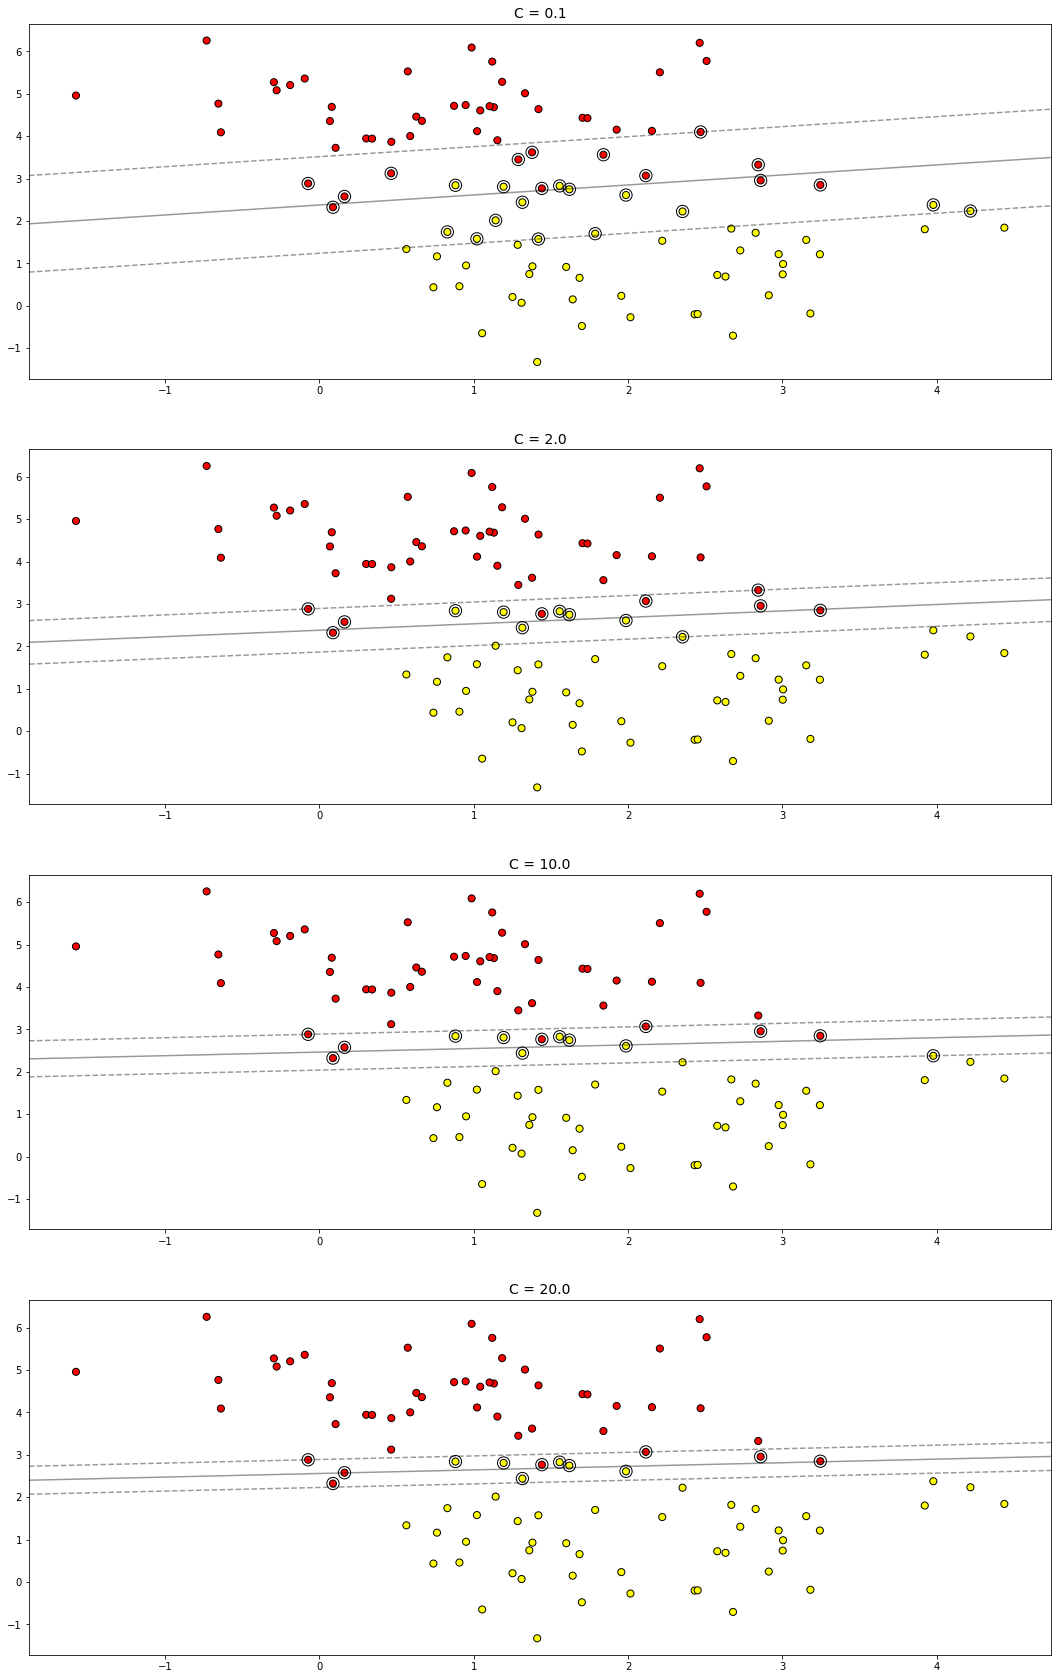

In [6]:
fig, ax = plt.subplots(4, 1, figsize=(16, 30))
for axi, C in zip(ax, [0.1, 2.0, 10.0, 20.0]):
    fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolors='black')
    plotSVC(model, axi)
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

## 3. Multiclass
It is also possible to fit for multiple classifications  
Note how that as the gamma parameter increases the effect the points have on the separation increases

In [7]:
def drawMulticlass(gamma=.1, classes = 3):
    X, y = make_blobs(n_samples=150, centers=classes, random_state=0, cluster_std=0.60)
    model = SVC(kernel='rbf', C=1, gamma=gamma)
    model.fit(X, y)

    # Set-up 2x2 grid for plotting.
    fig, ax = plt.subplots(1, figsize=(16, 16))
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    X0, X1 = X[:, 0], X[:, 1]
    x_min, x_max = X0.min() - 1, X0.max() + 1
    y_min, y_max = X1.min() - 1, X1.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

    P = model.predict(np.c_[xx.ravel(), yy.ravel()])
    P = P.reshape(xx.shape)

    #ax.contourf(xx, yy, P, cmap=plt.cm.coolwarm, levels=[-1, 0, 1], alpha=0.4, linestyles=['dashed', 'solid', 'dashed'])
    ax.contourf(xx, yy, P, cmap=plt.cm.coolwarm, alpha=0.4)

    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())

    plt.show()

# try changing the gamma and classes values to see how the result changes
# it can be a bit slow, but demonstrating is fun!
interact(drawMulticlass, gamma=(1, 40, 5), classes=(3, 7, 1));

interactive(children=(IntSlider(value=1, description='gamma', max=40, min=1, step=5), IntSlider(value=3, description='classes', max=7, min=3), Output()), _dom_classes=('widget-interact',))

## 4. A Nonlinear Problem

The original maximum-margin hyperplane algorithm proposed by Vapnik in 1963 constructed a linear classifier.

However, in 1992, Bernhard E. Boser, Isabelle M. Guyon and Vladimir N. Vapnik suggested a way to create nonlinear classifiers by applying the kernel trick (originally proposed by Aizerman) to maximum-margin hyperplanes.

The resulting algorithm is formally similar, except that every dot product is replaced by a nonlinear kernel function.  
This allows the algorithm to fit the maximum-margin hyperplane in a transformed feature space. 

The transformation may be nonlinear and the transformed space high dimensional; although the classifier is a hyperplane in the transformed feature space, it may be nonlinear in the original input space.

It is noteworthy that working in a higher-dimensional feature space increases the generalization error of support vector machines, although given enough samples the algorithm still performs well.

### 4.1. Generating a Dataset

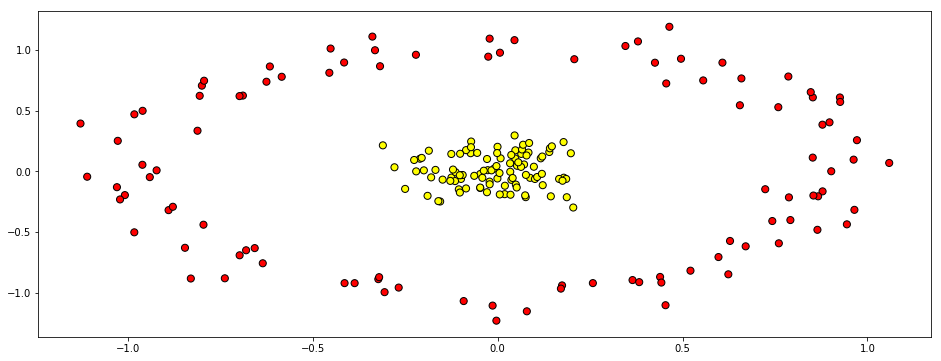

In [8]:
X, y = make_circles(200, factor=.1, noise=.1)
r = np.exp(-(X ** 2).sum(1))

clf = SVC(kernel='linear').fit(X, y)
fig, ax = plt.subplots(1, figsize=(16, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolor='black')
plotSVC(clf, drawBoundary=False);

### 4.2. Radial Basis Function Kernel
When mapping the decision boundary and margins for a non-linear pair the most common kernel used is the Radial Basis Function (RBF)

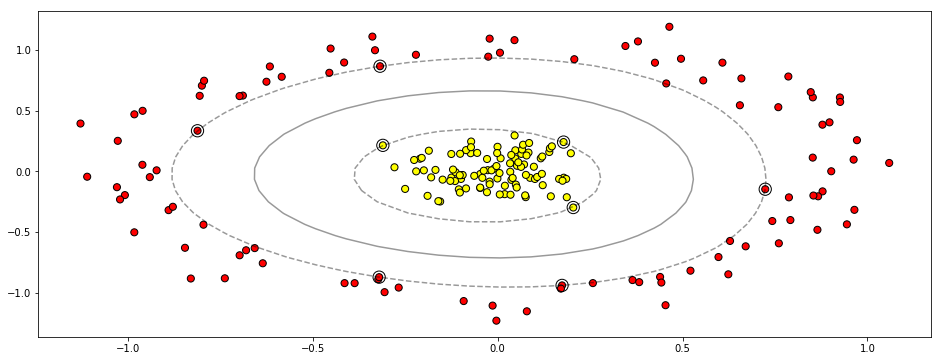

In [9]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)
fig, ax = plt.subplots(1, figsize=(16, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn', edgecolor='black')
plotSVC(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none');

## 5. Prediction
After training the model it can be used to predict the classes of new points

the new points:
[2.231007610968585, 3.7816913454226064] 	 - classification:	 Red
[0.87590627026359913, -0.6084195149528504] 	 - classification:	 Yellow
[0.39928600522705215, -0.068656240527231516] 	 - classification:	 Yellow
[-0.060118299818904708, 4.7716542142072758] 	 - classification:	 Red
[0.8850574858489868, -0.4025507767182871] 	 - classification:	 Yellow
[0.42264202878875956, 0.41759855750794639] 	 - classification:	 Yellow
[2.7580173664823309, -0.37758694489910072] 	 - classification:	 Yellow
[1.9388445516768504, 5.2701440915489508] 	 - classification:	 Red
[0.5120584553651375, 3.2586409562544212] 	 - classification:	 Red
[1.0238535021050506, 3.5521283383956694] 	 - classification:	 Red
[2.6348187176368385, -1.0893006374674692] 	 - classification:	 Yellow
[1.7053260651989164, 5.0615580999236345] 	 - classification:	 Red
[0.2890022549392095, -0.56332273326296867] 	 - classification:	 Yellow
[0.7886305896555863, 0.90649056858655386] 	 - classification:	 Yellow
[2.7676383677458505

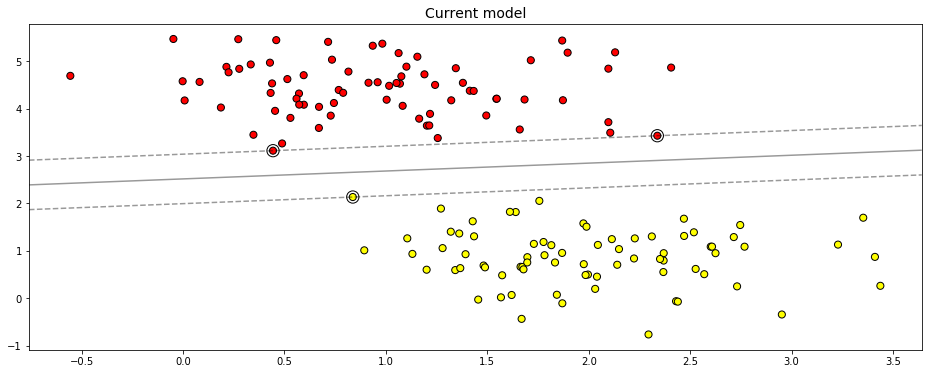

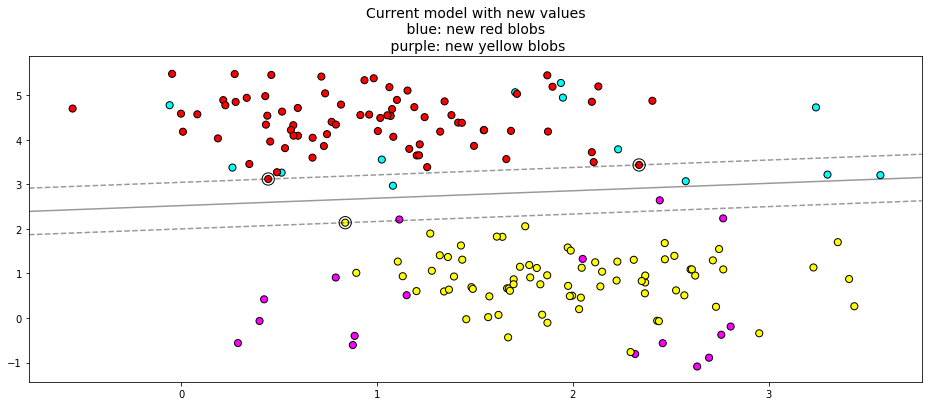

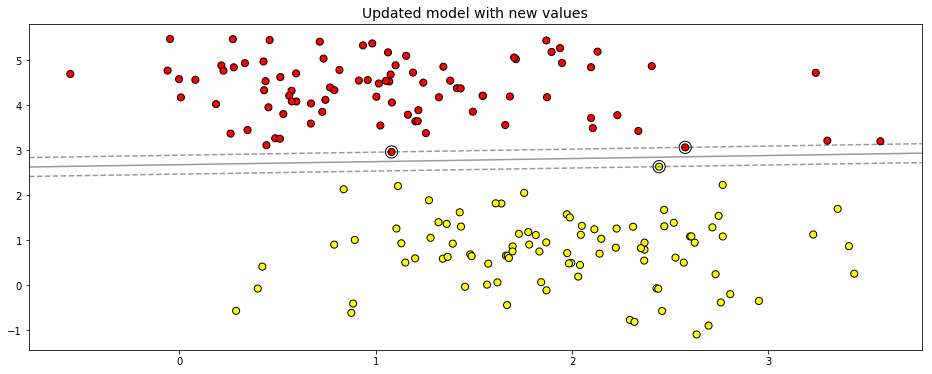

In [10]:
fig, ax = plt.subplots(1, figsize=(16, 6))
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn', edgecolors='black')
ax.set_title('Current model'.format(C), size=14)
plotSVC(model1)

# fetching the boundaries of the plot for convenience
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# randomly generating a new set of points within the boundaries of the plot
newCoords = []
for i in range(30):
    newCoords.append([random.uniform(xlim[0], xlim[1]), random.uniform(ylim[0], ylim[1])])

newClassification = model1.predict(newCoords)

def getColumn(matrix, i):
    return [row[i] for row in matrix]

n = 0
print('the new points:')
for classification in newClassification:
    if(classification == 0):
        print(newCoords[n], '\t - classification:\t', 'Red')
    else:
        print(newCoords[n], '\t - classification:\t', 'Yellow')
    n = n + 1
    
fig, ax = plt.subplots(1, figsize=(16, 6))
plt.scatter(getColumn(newCoords, 0), getColumn(newCoords, 1), c=newClassification, s=50, cmap='cool', edgecolors='black')
plt.scatter(X1[:, 0], X1[:, 1], c=y1, s=50, cmap='autumn', edgecolors='black')
ax.set_title('Current model with new values\n blue: new red blobs \n purple: new yellow blobs'.format(C), size=14)
plotSVC(model1)

combinedX = np.append(X1, newCoords, axis=0)
combinedY = np.append(y1, newClassification, axis=0)

# lets remodel and plot with the new values
fig, ax = plt.subplots(1, figsize=(16, 6))
plt.scatter(combinedX[:, 0], combinedX[:, 1], c=combinedY, s=50, cmap='autumn', edgecolors='black')
ax.set_title('Updated model with new values'.format(C), size=14)
newModel = SVC(kernel='linear', C=1E10).fit(combinedX, combinedY)
plotSVC(newModel)
